## Context
The data comes from https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts.

WallStreetBets (r/wallstreetbets, also known as WSB), is a subreddit where participants discuss stock and option trading. It has become notable for its profane nature and allegations of users manipulating securities.

Recently the community became mainstream again with its interest on GameStop shares (GME).


## Tasks:
1. Sentiment analysis;
2. Text analysis (lengh of posts, most popular days to post, when people started to talk about GME, how often did it occur etc);

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re #regex
import nltk # stopwords:slowa tyu 'the', 'a' etc
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # usuwa odmiany slow, czasy

dataset = pd.read_csv('reddit_wsb.csv')
df = dataset.copy()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kasia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data cleaning

In [6]:
# I will drtop unnecessary columns:

df = df.drop(columns=['id', 'url', 'created'])
df.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56


In [7]:
df = df.drop_duplicates()
df.shape

(33307, 5)

In [15]:
df = df[df['body'].notna()]

## Analysis of text

#### Checking occurence of some tickers:

In [16]:
df['title'] = df['title'].str.lower()
df['body'] = df['body'].str.lower()

amct = df['title'].str.contains('amc')
sum_of_amct = amct.sum()
amcb = df['body'].str.contains('amc')
sum_of_amcb = amcb.sum()

gmet = df['title'].str.contains('gme')
sum_of_gmet = gmet.sum()
gmeb = df['body'].str.contains('gme')
sum_of_gmeb = gmeb.sum()

print('There were',sum_of_amct,'occurences of AMC ticker in titles and',sum_of_amcb , 'in body.')
print('There were',sum_of_gmet,'occurences of GME ticker in titles and',sum_of_gmeb , 'in body.')

There were 1438 occurences of AMC ticker in titles and 2111 in body.
There were 3518 occurences of GME ticker in titles and 5834 in body.


#### Checking length of posts:

In [17]:
df['title_length'] = df['title'].str.len()

print("Total length of a dataset: ", df.title_length.sum(), "characters")
print("Average length of a body of the post: ", round(df.title_length.mean(),0), "characters")

Total length of a dataset:  880618 characters
Average length of a body of the post:  50.0 characters


#### Checking when people started to talk about AMC

In [45]:
#AMC in titles
df.loc[(df['title'].str.contains('amc'))].sort_values('timestamp',ascending=True).head()

,title,score,comms_num,body,timestamp,title_length,title_sentiment,day_of_week
253,what are you doing to amc?,67,55,hey retards what the hell is going on with amc...,2021-01-28 09:08:21,26,Neutral,3
236,deluge of spam posts of stocks like nokia and ...,43,20,"i might not be able to read letters, but numbe...",2021-01-28 09:10:11,124,Neutral,3
234,potential gamma squeeze on amc friday?,28,14,all the current options are deep itm. will thi...,2021-01-28 09:10:32,38,Neutral,3
232,with well over a billion trades on $amc would ...,24,27,what am i missing people? $amc has seen over b...,2021-01-28 09:10:44,107,Neutral,3
226,down on amc by a lot,51,100,"down heavy on amc, 49k shares @18.90 please he...",2021-01-28 09:11:46,20,Neutral,3


In [46]:
#AMC in body
df.loc[(df['body'].str.contains('amc'))].sort_values('timestamp',ascending=True).head()

,title,score,comms_num,body,timestamp,title_length,title_sentiment,day_of_week
255,i got in late on gme but i believe in the caus...,75,14,you guys are amazing. thank you for sending gm...,2021-01-28 09:08:18,78,Neutral,3
253,what are you doing to amc?,67,55,hey retards what the hell is going on with amc...,2021-01-28 09:08:21,26,Neutral,3
236,deluge of spam posts of stocks like nokia and ...,43,20,"i might not be able to read letters, but numbe...",2021-01-28 09:10:11,124,Neutral,3
232,with well over a billion trades on $amc would ...,24,27,what am i missing people? $amc has seen over b...,2021-01-28 09:10:44,107,Neutral,3
231,gamma squeeze imminent sorrento therapeutics,0,12,"this is my dd of srne, just yesterday news cam...",2021-01-28 09:11:00,44,Neutral,3


#### Checking most popular words in col 'body':

In [26]:
#making list of all bodies (cleaned and splitted to words):

def create_list_of_words(df,col):
    list_of_bodies = []
    for i, content in df[col].items():
        for i in content.split():
            list_of_bodies.append(i.lower())
    return list_of_bodies

list_of_bodies = create_list_of_words(df,'body')
print(list_of_bodies[0:10])

['the', 'ceo', 'of', 'nasdaq', 'pushed', 'to', 'halt', 'trading', '“to', 'give']


In [27]:
#stemming and removing stopwords:
#ps = PorterStemmer()
#list_of_bodies = [ps.stem(word) for word in list_of_bodies if not word in set(stopwords.words('english'))]   
#print(list_of_bodies[0:10])

In [28]:
#removing stop words:

stop_words = set(stopwords.words('english'))  
list_of_bodies = [i for i in list_of_bodies if not i in stop_words]
print(list_of_bodies[0:10])

['ceo', 'nasdaq', 'pushed', 'halt', 'trading', '“to', 'give', 'investors', 'chance', 'recalibrate']


In [30]:
#retrieving 10 most popularwords:

from collections import Counter
counter_dict = Counter(list_of_bodies)

counter_dict_sorted = {k:v for k,v in sorted(counter_dict.items(), key= lambda x: x[1], reverse=True)}
print(dict(list(counter_dict_sorted.items())[0:10]))

{'gme': 7174, 'like': 6631, 'buy': 5949, 'short': 5926, 'stock': 5924, 'shares': 5743, 'people': 5399, 'get': 5197, 'market': 5015, 'price': 4648}


In [31]:
popular_words = pd.DataFrame(counter_dict_sorted.items(), columns=['Word', 'Occurence'])
popular_words.head(10)

,Word,Occurence
0,gme,7174
1,like,6631
2,buy,5949
3,short,5926
4,stock,5924
5,shares,5743
6,people,5399
7,get,5197
8,market,5015
9,price,4648


#### Analizing the sentiment of titles

In [32]:
from textblob import TextBlob

titles=df[["title"]].dropna()
titles=list(titles["title"]) #changing df col into list
title_sentiment=[]

for title in titles:
    polarity = TextBlob(title).sentiment.polarity
    if polarity>0.5:
        title_sentiment.append("Positive")
    elif polarity<-0.5:
        title_sentiment.append("Negative")
    else:
        title_sentiment.append("Neutral")

        
df['title_sentiment']= title_sentiment
df.head()

,title,score,comms_num,body,timestamp,title_length,title_sentiment
2,exit the system,0,47,the ceo of nasdaq pushed to halt trading “to g...,2021-01-28 21:30:35,15,Neutral
6,short stock doesn't have an expiration date,317,53,hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,43,Neutral
7,this is the moment,405,178,life isn't fair. my mother always told me that...,2021-01-28 21:19:31,18,Neutral
10,"we need to keep this movement going, we all ca...",222,70,i believe right now is one of those rare oppo...,2021-01-28 21:18:25,61,Neutral
12,"once you're done with gme - $ag and $slv, the ...",0,16,you guys are champs. gme... who would have tho...,2021-01-28 21:17:10,101,Neutral


Text(0.5, 1.0, 'Titles Sentiment')

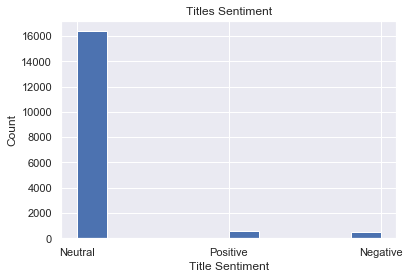

In [33]:
import seaborn as sns
sns.set()
df['title_sentiment'].hist(figsize=(6,4))

plt.xlabel('Title Sentiment')
plt.ylabel('Count')
plt.title('Titles Sentiment')

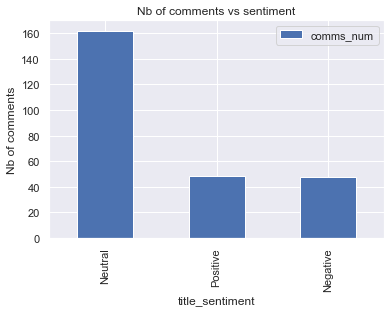

In [34]:
group = df.groupby(by='title_sentiment')[['comms_num']].mean().sort_values(by='comms_num', ascending=False)
group.plot.bar(figsize=(6,4))
plt.ylabel('Nb of comments')
plt.title('Nb of comments vs sentiment')
plt.show()

In [ ]:
# basing on these two plots, we can observe that titles that have not neutral sentiment are more commonly commented

#### Checking on which day of week people comment the most

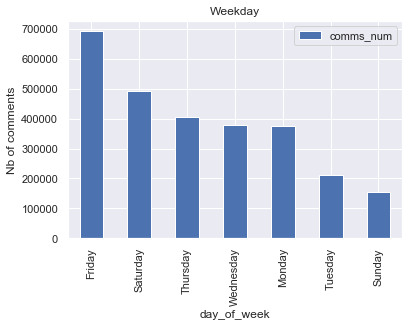

In [52]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day_of_week'] = df['timestamp'].dt.weekday
df['day_of_week'] = df['day_of_week'].map({0:'Monday', 1: 'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

group1 = df.groupby(by='day_of_week')[['comms_num']].sum().sort_values(by='comms_num', ascending=False).head(10)
group1.plot.bar(figsize=(6,4))
plt.ylabel('Nb of comments')
plt.title('Weekday')
plt.show()

#### Checking how the engagement in a group was changing over the days

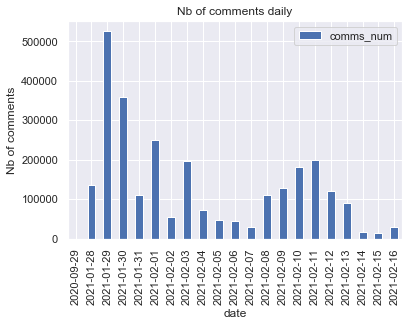

In [60]:
df['date'] = df['timestamp'].dt.date
group2 = df.groupby(by='date')[['comms_num']].sum()
group2.plot.bar(figsize=(6,4))
plt.ylabel('Nb of comments')
plt.title('Nb of comments daily')
plt.show()